**해군사 AI 과정**

Dat 4: 딥러닝 기초 I (2021-06-03)

User: 문영제

실습 #1: **퍼셉트론** 모형 학습하여 Iris 분류 문제 풀기

## 0. 데이터셋 준비

In [1]:
#iris 데이터 로딩하기

from sklearn import datasets

iris = datasets.load_iris()

list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [2]:
# iris feature 정보

print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
# iris feature 데이터들: 2차원 행렬이며, [꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비]. 150행

print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [4]:
# iris 분류 정보 (상세 꽃 이름)
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [5]:
# iris target 값 (각 feature 정보에 대한 결과가 하나의 요소로...)
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## 1. feature 2 개 (petal length, petal with) 를 이용한 퍼셉트론 모형 학습

In [6]:
# 필요 패키지들 로딩하기 

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Perceptron    # scikit-learn 의 Perceptron 사용

In [8]:
# feature 데이터에서 petal length (3열) 과 petal width (4열) 을 
# 따로 추출하여 변수 X 에 저장하기

X = iris.data[:, 2:] 


In [10]:
# target 값을 재코딩하기 (setosa => 1, 나머지 => 0)
# 기존 setosa는 0의 값을 가졌었음

# iris에서 target멤버에는 target의 값들을 가지고 있었음 (위 실행 결과 확인)
y = (iris.target == 0)

y = y.astype(np.int)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [15]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [16]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [17]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


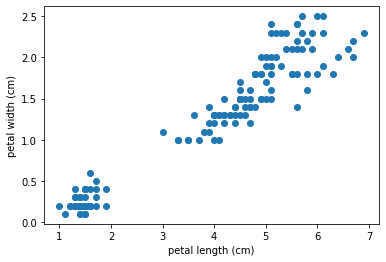

In [18]:
# X 의 분포를 표현하기

plt.scatter(X[:, 0], X[:, 1])   # x is "petal length", and y is "petal width"
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

간단한 테스트:
- X데이터 중에 y (target)의 값이 0인 것을 찾아보자
  - 이것의 의미는 X데이터와 y는 같은 길이이며, y가 0인 것에 해당하는 모든 X의 데이터를 추출하는 문법!

In [20]:
print(X[:, 0])
print(X[:, 0][y==0])

[1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 1.5 1.6 1.4 1.1 1.2 1.5 1.3 1.4
 1.7 1.5 1.7 1.5 1.  1.7 1.9 1.6 1.6 1.5 1.4 1.6 1.6 1.5 1.5 1.4 1.5 1.2
 1.3 1.4 1.3 1.5 1.3 1.3 1.3 1.6 1.9 1.4 1.6 1.4 1.5 1.4 4.7 4.5 4.9 4.
 4.6 4.5 4.7 3.3 4.6 3.9 3.5 4.2 4.  4.7 3.6 4.4 4.5 4.1 4.5 3.9 4.8 4.
 4.9 4.7 4.3 4.4 4.8 5.  4.5 3.5 3.8 3.7 3.9 5.1 4.5 4.5 4.7 4.4 4.1 4.
 4.4 4.6 4.  3.3 4.2 4.2 4.2 4.3 3.  4.1 6.  5.1 5.9 5.6 5.8 6.6 4.5 6.3
 5.8 6.1 5.1 5.3 5.5 5.  5.1 5.3 5.5 6.7 6.9 5.  5.7 4.9 6.7 4.9 5.7 6.
 4.8 4.9 5.6 5.8 6.1 6.4 5.6 5.1 5.6 6.1 5.6 5.5 4.8 5.4 5.6 5.1 5.1 5.9
 5.7 5.2 5.  5.2 5.4 5.1]
[4.7 4.5 4.9 4.  4.6 4.5 4.7 3.3 4.6 3.9 3.5 4.2 4.  4.7 3.6 4.4 4.5 4.1
 4.5 3.9 4.8 4.  4.9 4.7 4.3 4.4 4.8 5.  4.5 3.5 3.8 3.7 3.9 5.1 4.5 4.5
 4.7 4.4 4.1 4.  4.4 4.6 4.  3.3 4.2 4.2 4.2 4.3 3.  4.1 6.  5.1 5.9 5.6
 5.8 6.6 4.5 6.3 5.8 6.1 5.1 5.3 5.5 5.  5.1 5.3 5.5 6.7 6.9 5.  5.7 4.9
 6.7 4.9 5.7 6.  4.8 4.9 5.6 5.8 6.1 6.4 5.6 5.1 5.6 6.1 5.6 5.5 4.8 5.4
 5.6 5.1 5.1 5.9 5.7 5.2 5.  

[]

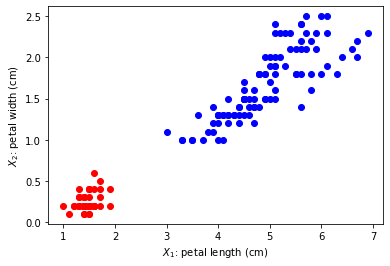

In [21]:
# target 값에 따른 X 의 분포를 표현하기

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], c='blue') # y가 0인 X데이터들만
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], c='red')  # y가 1인 X데이터들만
plt.xlabel("$X_1$: " + iris.feature_names[2]) # petal length (수학 표현식 포함)
plt.ylabel("$X_2$: " + iris.feature_names[3]) # petal width  ($으로 감쌈)
plt.plot()

In [22]:
# 모형 지정하기
# 우리는 단일 퍼셉트론을 사용할 것입니다.
    
per_clf = Perceptron()

In [23]:
# 모형 학습하기
# 웬만하면 학습은 fit() 함수
#   - 그 결과는 per_clf 객체 내에 저장

per_clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

## 2. 학습 결과 확인하기

In [24]:
# 학습된 가중치와 편향값 확인하기 

print(per_clf.coef_)
print(per_clf.intercept_)

[[-0.7 -1.2]]
[2.]


Text(0, 0.5, 'petal width')

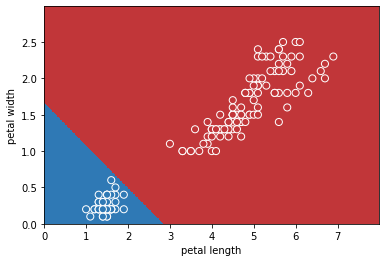

In [25]:
# 학습 결과를 그림으로 표현하기
xx, yy = np.meshgrid(np.arange(0, 8, 0.01), np.arange(0, 3.0, 0.01))

# 이 구간에서 
Z = per_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1)

# 바운더리 출력
plt.pcolormesh(xx, yy, Z, cmap="RdBu", vmin=-0.2, vmax=1.2)

# 데이터 점 출력
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, 
            cmap="RdBu", vmin=-0.2, vmax=1.2,
            edgecolor="white", linewidth=1)

# 축 설명 (꽃 잎)
plt.xlabel("petal length")
plt.ylabel("petal width")

Text(0.0, 1.0, 'Decision boundary: $2-0.7x_1-1.2x_2=0$')

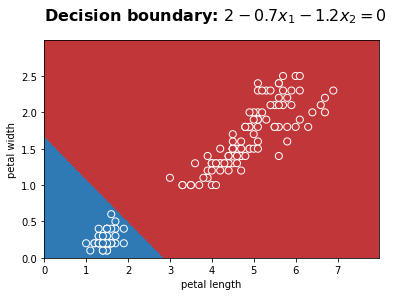

In [27]:
# 위 그림을 그대로 재현하되, 결정 경계식 (decision boundary) 의 수식을 추가하기 

xx, yy = np.meshgrid(np.arange(0, 8, 0.01), np.arange(0, 3.0, 0.01))

Z = per_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1)

plt.pcolormesh(xx, yy, Z, cmap = "RdBu", vmin = -.2, vmax = 1.2)

plt.scatter(X[:,0], X[:, 1], c=y, s=50, 
            cmap = "RdBu", vmin = -.2, vmax = 1.2,
            edgecolor="white", linewidth=1)

plt.xlabel("petal length")
plt.ylabel("petal width")

# 이 부분이 추가되었음: 결정경계식 추가

# font 정보 추가 (dict 타입)
title_font = {
    'fontsize' : 16,
    'fontweight' : 'bold'
}

plt.title('Decision boundary: $2-0.7x_1-1.2x_2=0$', 
          fontdict=title_font, loc='left', pad=20)


[참고](https://wikidocs.net/92090)
- loc='left': 왼쪽으로 정렬
- pad=20: pad=20은 타이틀과 그래프와의 간격 (오프셋)을 포인트 단위로 설정

In [28]:
# training error 출력하기 

np.sum(per_clf.predict(X) != y)

0

Setosa와 그 외의 것들은 분류하기 쉬운 상황이었음 (이전 실습 때 사용한 Verginica보다는 경계가 명확하기 때문)

In [35]:
# petal length = 1.4 cm, petal with = 0.2 cm 일때의 iris 종류 예측하기

y_pred = per_clf.predict([[1.4, 0.2]])
print(y_pred)

# 참고로 위 데이터는 iris flower data set의 첫 번째 데이터이며,
# setosa이면 0이고, 아니면 1인 경우로 학습이 되었음
# 결과가 1나오면, 본래 정답인 setosa가 맞으므로 정답임!

[1]
